<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/10%EC%9B%94%2027%EC%9D%BC/10%EC%9B%94_27%EC%9D%BC_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 오늘 오전 내용이 weather, dust 합치는 거라 26일 자료 필요
import pandas as pd
import matplotlib.pyplot as plt
filename = r'/content/sample_data/dust.xlsx'
dust = pd.read_excel(filename)
dust.rename(columns={'날짜':'date','아황산가스':'SO2','일산화탄소':'CO', '오존':'O3', '이산화질소':'NO2'},inplace=True)
dust['date'] = dust['date'].str[:11]
dust['date'] = pd.to_datetime(dust['date'])

dust['year'] = dust['date'].dt.year
dust['month'] = dust['date'].dt.month
dust['day'] = dust['date'].dt.day

dust = dust[['date','year','month','day','SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM2.5']]
dust = dust.fillna(method='pad')
dust.fillna(20, inplace=True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
file = r'/content/sample_data/weather.xlsx'
weather = pd.read_excel(file)

# 필요없는 컬럼 지우기(지점, 지점명)
weather = weather.drop(['지점','지점명'],axis=1)
weather.columns

Index(['일시', '기온(°C)', '풍속(m/s)', '강수량(mm)', '습도(%)'], dtype='object')

In [ ]:
# 컬럼 이름 변경
weather.rename(columns={'일시':'date','기온(°C)':'temp','풍속(m/s)':'wind', '강수량(mm)':'rain', '습도(%)':'humid'},inplace=True)
weather.columns

Index(['date', 'temp', 'wind', 'rain', 'humid'], dtype='object')

In [ ]:
# 날짜 데이터타입 변경
weather['date'] = pd.to_datetime(weather['date']).dt.date
weather['date'] = pd.to_datetime(weather['date'])
weather.dtypes

date     datetime64[ns]
temp            float64
wind            float64
rain            float64
humid           float64
dtype: object

In [ ]:
# 강수량이 0인 데이터 0.01로 변경
weather['rain'] = weather['rain'].replace(0,0.01)
# weather.head()
weather['rain'].value_counts()

0.01    720
0.50      9
1.00      7
1.50      3
2.50      2
2.00      2
Name: rain, dtype: int64

In [ ]:
# 여기서 부터 27일 진도
# 미세먼지와 날씨 상관관계 알아보기 위해 두 엑셀 파일 합치기
print(dust.shape)
print(weather.shape)

(744, 10)
(743, 5)


In [ ]:
# 위에서 보면 인덱스 차이가 있으므로 인덱스 개수를 동일하게 해야함
dust.drop(index=743,inplace=True)
df = pd.merge(weather,dust,on='date')  # merge 통해 합침
df.head()

KeyError: ignored

In [ ]:
# 상관관계 확인 --> corr() 함수
# 데이터가 전부 수치 데이터여야 상관관계 확인가능
corr = df.corr()
corr

<ipython-input-15-eaac4b84f14c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,temp,wind,rain,humid,year,month,day,SO2,CO,O3,NO2,PM10,PM2.5
temp,1.000000,-0.211112,0.077652,0.213428,NaN,NaN,0.491312,-0.375131,0.318052,-0.203804,0.313188,0.175430,0.190698
wind,-0.211112,1.000000,-0.077998,-0.461900,NaN,NaN,-0.074944,0.031460,-0.322431,0.355105,-0.403745,-0.108474,-0.202018
rain,0.077652,-0.077998,1.000000,0.284108,NaN,NaN,0.026688,-0.019907,0.077531,-0.096761,0.109930,0.026272,0.069123
humid,0.213428,-0.461900,0.284108,1.000000,NaN,NaN,0.176721,-0.096445,0.338083,-0.288327,0.315524,0.216753,0.354713
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,0.491312,-0.074944,0.026688,0.176721,NaN,NaN,1.000000,-0.318239,0.226099,-0.118081,0.206333,0.016124,0.051036
SO2,-0.375131,0.031460,-0.019907,-0.096445,NaN,NaN,-0.318239,1.000000,0.141117,-0.068687,0.085989,0.160874,0.147571
CO,0.318052,-0.322431,0.077531,0.338083,NaN,NaN,0.226099,0.141117,1.000000,-0.756706,0.841594,0.529720,0.692664
O3,-0.203804,0.355105,-0.096761,-0.288327,NaN,NaN,-0.118081,-0.068687,-0.756706,1.000000,-0.924362,-0.348229,-0.525078


In [ ]:
# 미세먼지와 다른 요소들 간의 상관관계를 내림차순 정렬
corr['PM10'].sort_values(ascending=False)

PM10     1.000000
PM2.5    0.825433
CO       0.529720
NO2      0.420554
humid    0.216753
temp     0.175430
SO2      0.160874
rain     0.026272
day      0.016124
wind    -0.108474
O3      -0.348229
year          NaN
month         NaN
Name: PM10, dtype: float64

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>],
       [<Axes: title={'center': 'humid'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'SO2'}>, <Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'O3'}>, <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'PM2.5'}>, <Axes: >, <Axes: >]],
      dtype=object)

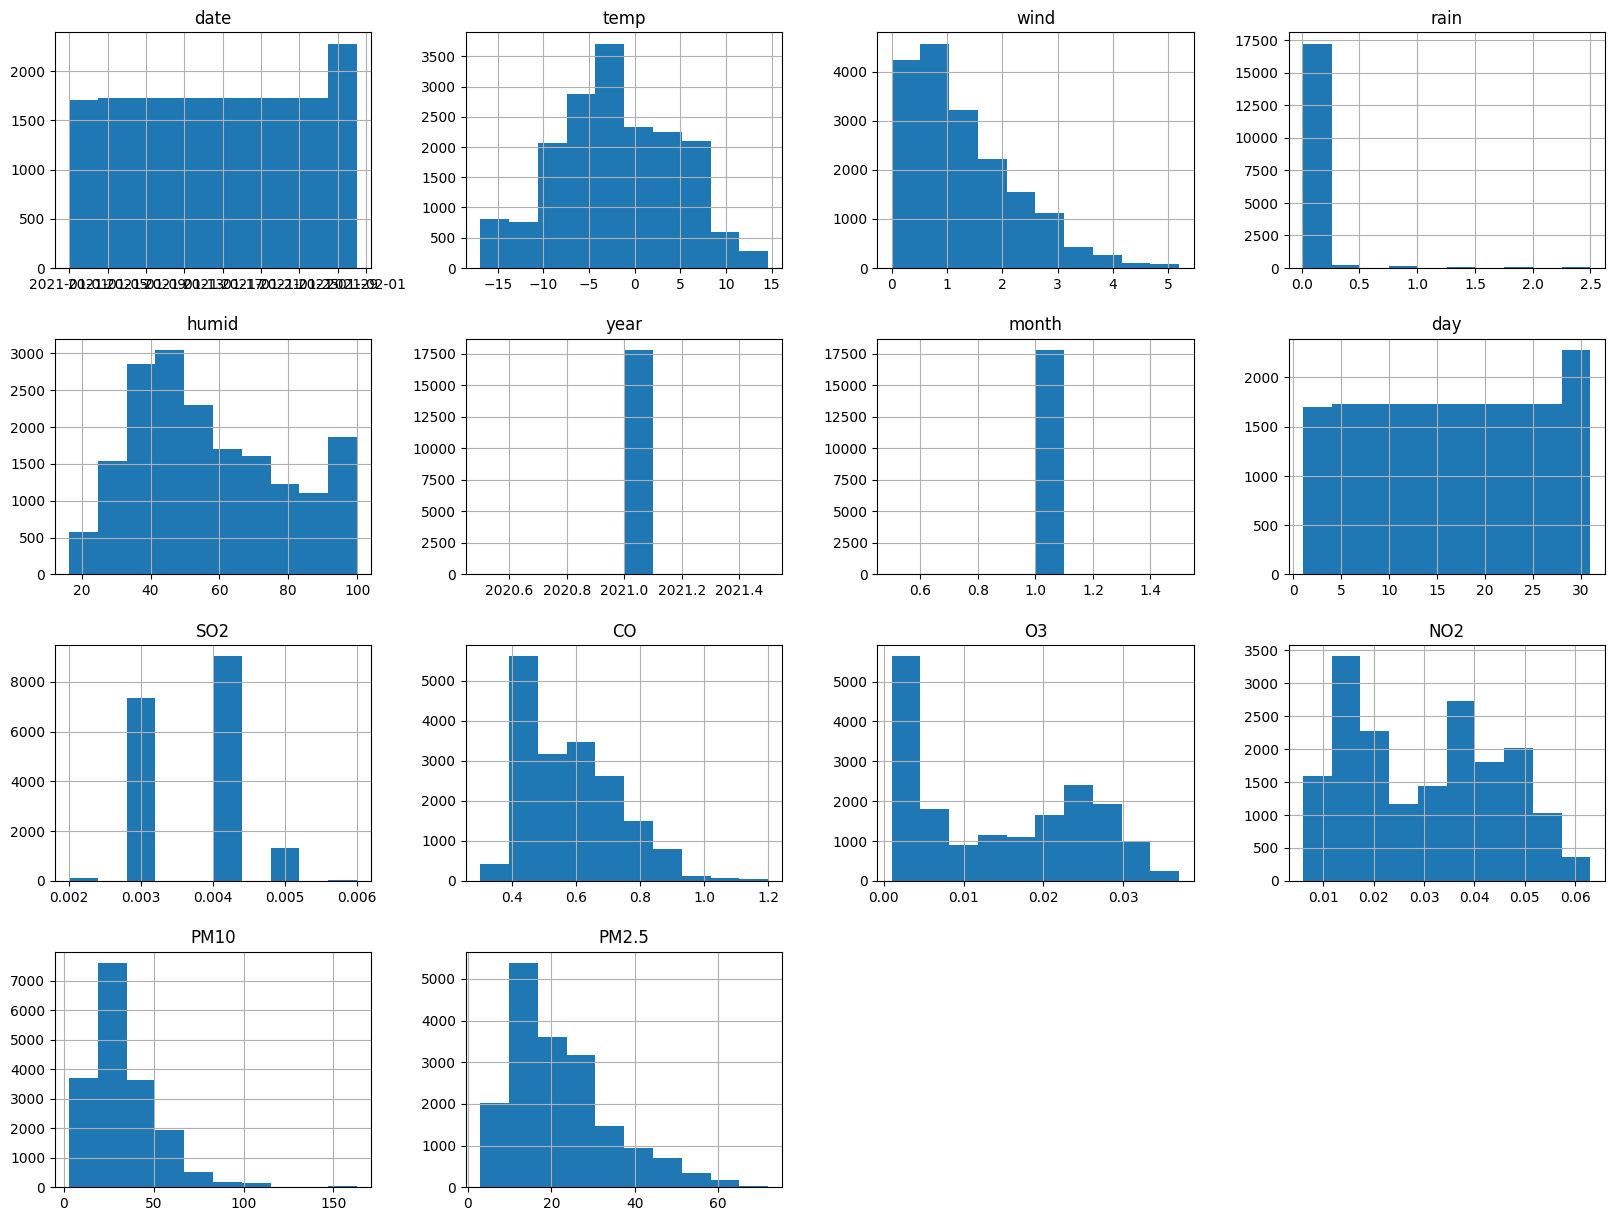

In [ ]:
# 시각화 - 히스토그램
df.hist(figsize=(20,15))

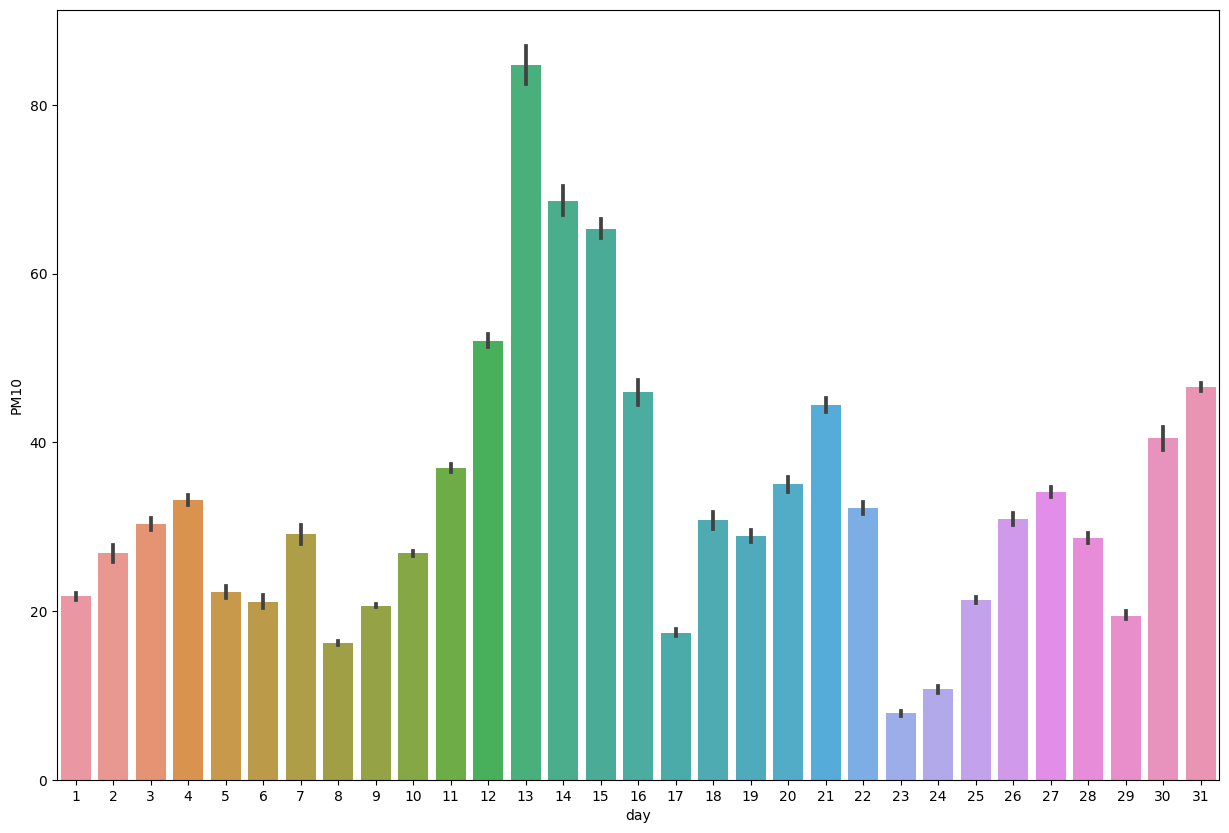

In [ ]:
# 시각화 - 막대그래프
import seaborn as sns
plt.figure(figsize=(15,10))
dayGraph = sns.barplot(x='day',y='PM10',data=df)
plt.xticks(rotation=0)
plt.show()

<Axes: >

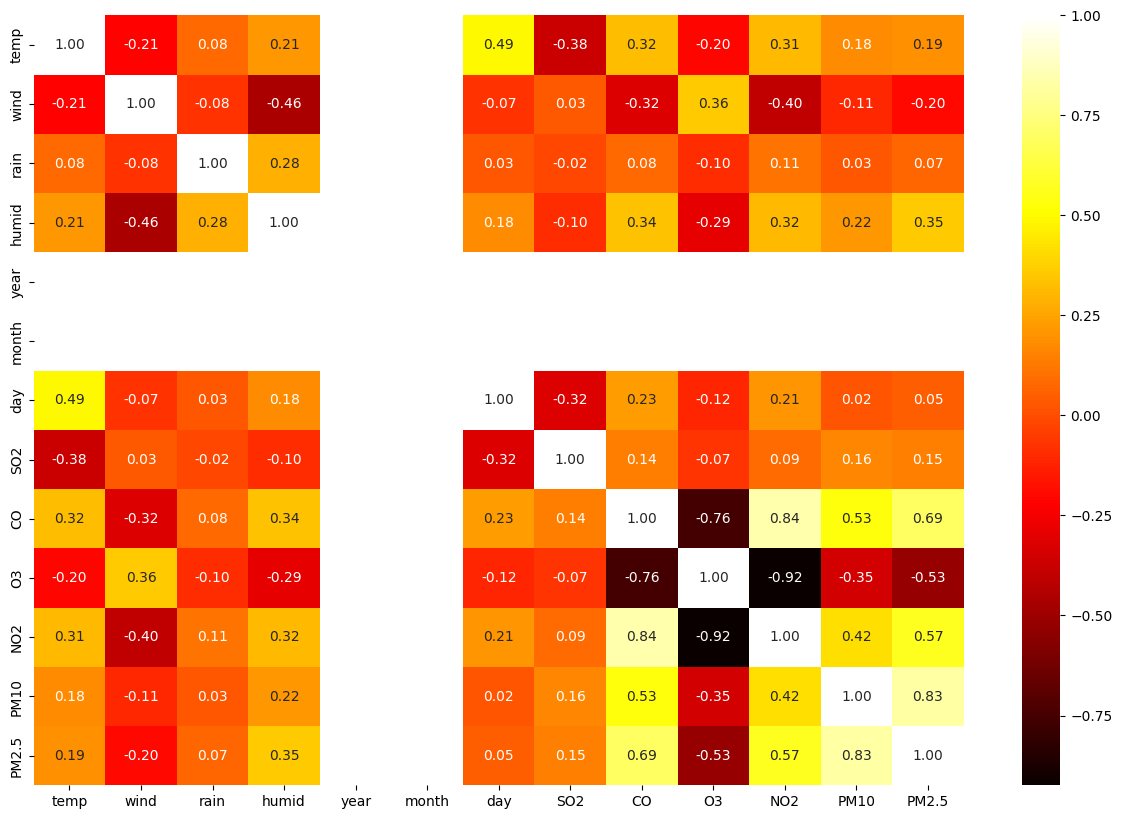

In [ ]:
# 시각화 - 히트맵
# 상관관계 볼때 많이 사용
plt.figure(figsize=(15,10))
sns.heatmap(data=corr, annot=True, fmt='.2f', cmap='hot')

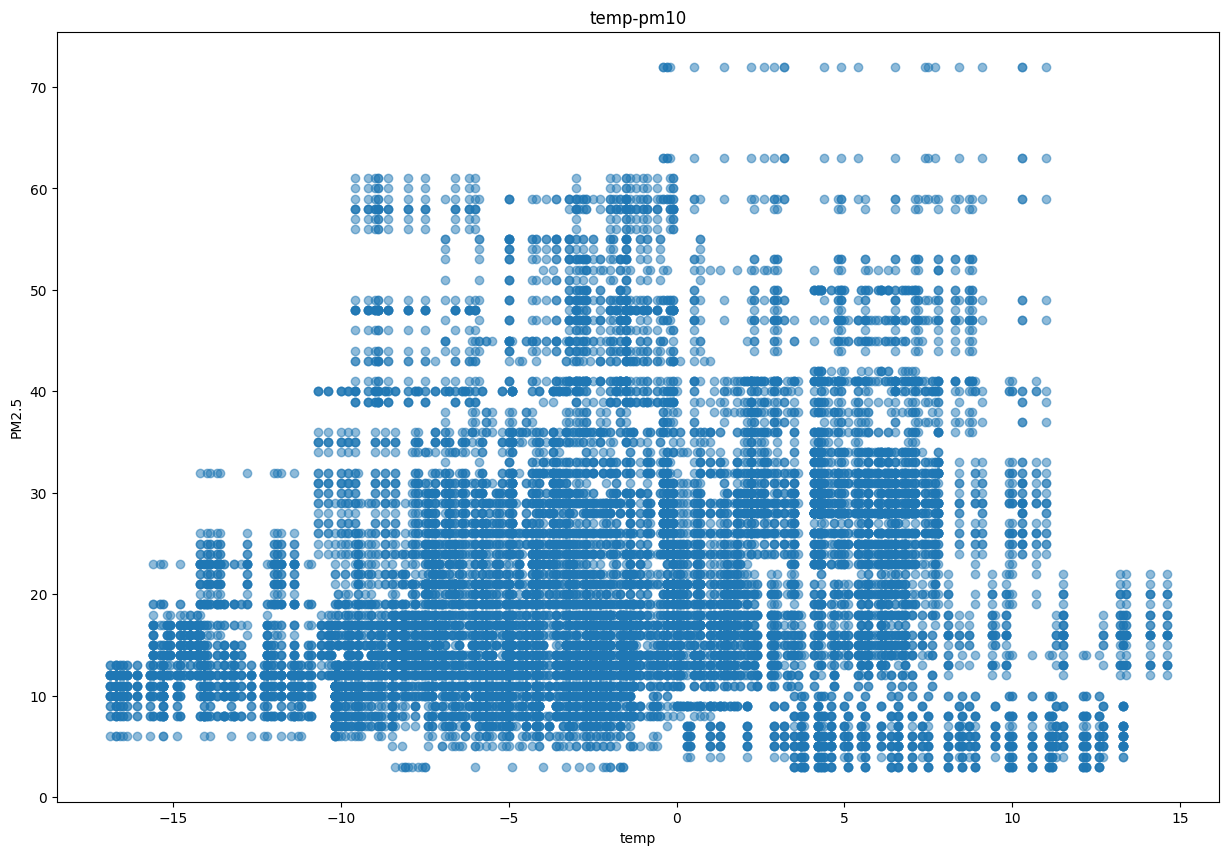

In [ ]:
# 온도와 미세먼지 상관관계를 산점도로
plt.figure(figsize=(15,10))
x = df['temp']
y = df['PM2.5']
plt.plot(x,y,marker = 'o',linestyle='none',alpha=0.5)
plt.title('temp-pm10')
plt.xlabel('temp')
plt.ylabel('PM2.5')
plt.show()

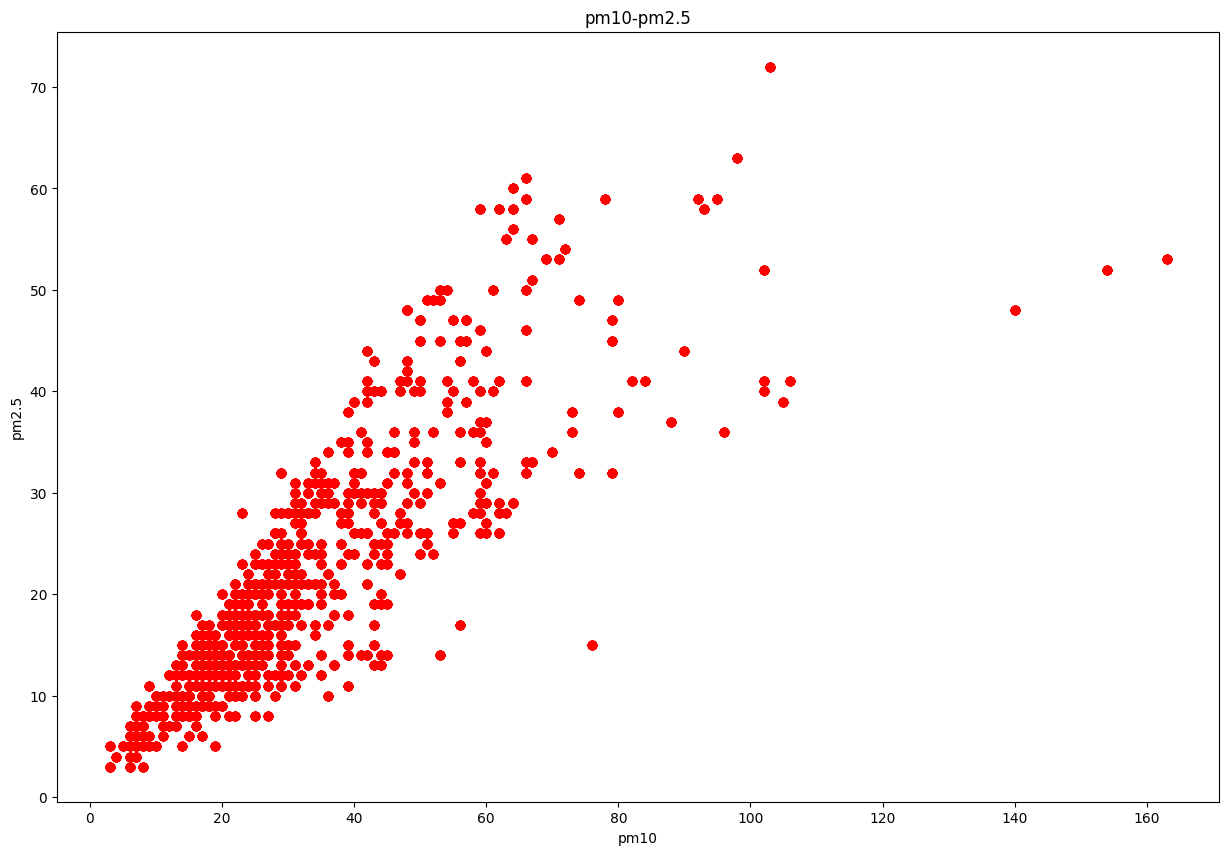

In [ ]:
# 미세먼지와 초미세먼지 상관관계 산점도
plt.figure(figsize=(15,10))
x=df['PM10'] #미세먼지
y=df['PM2.5']#초미세먼지
plt.plot(x,y,marker='o',linestyle='none',color='red',alpha=0.5)
plt.title('pm10-pm2.5')
plt.xlabel('pm10')
plt.ylabel('pm2.5')
plt.show()

In [ ]:
# 오후 진도 --> 데이터 전처리 해보기
import pandas as pd
filename = r'/content/sample_data/owid-covid-data.csv'
covid = pd.read_csv(filename)
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [ ]:
# 위 covid 파일에서 원하는거 불러오기
# iso_code, location, date, total_cases, population
sample = covid[['iso_code','location','date','total_cases','population']]
sample.head()

,iso_code,location,date,total_cases,population
0,AFG,Afghanistan,2020-02-24,5.0,39835428
1,AFG,Afghanistan,2020-02-25,5.0,39835428
2,AFG,Afghanistan,2020-02-26,5.0,39835428
3,AFG,Afghanistan,2020-02-27,5.0,39835428
4,AFG,Afghanistan,2020-02-28,5.0,39835428


In [ ]:
# 전체 국가 중 대한민국과 미국만 출력하기
# location 열에서 korea, usa 추출 (중복 data 없이)
loc = sample['location']
loc.unique()

# 한국 데이터프레임 생성
kor_df = sample[sample.location == 'South Korea']

# 데이터 프레임 index 변경 -> 'date'로
kor_df = kor_df.set_index('date')
print(kor_df.head(), '\n')

# 미국 데이터프레임 생성
usa_df = sample[sample.location == 'United States']

usa_df = usa_df.set_index('date')
print(usa_df.head())

Empty DataFrame
Columns: [iso_code, location, total_cases, population]
Index: [] 

Empty DataFrame
Columns: [iso_code, location, total_cases, population]
Index: []


In [ ]:
# 대한민국 & 미국 확진자 수 구하기
kor = kor_df['total_cases'].sum()
usa = usa_df['total_cases'].sum()

# 강사님 ver.
kor_case = kor_df['total_cases']
usa_case = kor_df['total_cases']

0.0
0.0


In [ ]:
# 특정 날짜 인구 구하기
kor_pop = kor_df['population']['2022-01-22']
usa_pop = usa_df['population']['2022-01-22']

# 인구 비율 구하기
rate = round(usa_pop/kor_pop,2)
rate

KeyError: ignored

In [ ]:
# 최종 데이터 프레임
final_df = pd.DataFrame({
    'KOR': kor_pop * rate,            # 비율 반영
    'USA' : usa_pop
    }, index=kor_df.index
)

In [ ]:
# 시각화 하기
import matplotlib.pyplot as plt
final_df['2022-01-01':].plot.line(rot=45)